In [ ]:
?print

In [ ]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
# %whos

# 句子长度统计

In [ ]:
# coding=utf-8
import json
import os
import re
import sys

import jieba
from tqdm import tqdm
import pandas as pd

sys.path.append("..")

from utils import dir_op


def clean_text(text:str):
    """Clean text by removing unnecessary characters and altering the format of words.
    nlg 任务的时候尽量保持原有的句子结构，不要去除停用词和标点，否则直接影响流畅程度
    """
    text = re.sub(r"\s", "", text)
#     text = " ".join(jieba.cut(text))

    return text


def main():
    root_dir = "data/phvm_data/data.jsonl"
    
# {
#     "feature": [["版型", "显瘦"], ["颜色", "灰色"], ["衣样式", "风衣"], ["衣样式", "外套"], ["衣袖型", "插肩袖"], ["衣门襟", "单排扣"]], 
#     "title": "", 
#     "largeSrc": "http://gw.alicdn.com/imgextra/i2/87171848/TB2BKKiahuTBuNkHFNRXXc9qpXa_!!87171848-2-daren.png_790x10000.jpg", 
#     "refSrc": "https://market.m.taobao.com/apps/market/content/index.html?&contentId=200550500064", 
#     "desc": "设计亮点这款中长款式的风衣外套，修身直筒的版型不仅仅穿着随意舒适，还能够轻松修饰身体轮廓更添高挑大气。时髦的插肩袖设计，也丰富了整体的层次感。衣门襟采用单排扣设计，显得厚实不失质感，很是吸引人的眼球。选用灰色调装饰，搭配起来也比较方便。", 
#     "file": "c0974de49d2bcf5cd49e1bb679f56d2c.jpg"
# }

    with open(root_dir, "r") as fr:
        with open("data/phvm_data/corpus.txt", "w") as fw:
            for line in tqdm(fr.readlines(), desc="评论数据", colour="green"):
                tmp = json.loads(line)
                desc = " ".join(jieba.cut(clean_text(tmp["desc"])))
                fw.write(desc+'\n')

if __name__ == "__main__":
    main()


评论数据:   0%|          | 0/118796 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/3t/1m9xhcvj70jbv7z9vqsrdz2c0000gn/T/jieba.cache
Loading model cost 0.536 seconds.
Prefix dict has been built successfully.
评论数据: 100%|██████████| 118796/118796 [00:56<00:00, 2120.66it/s]


In [ ]:
import json
import os
import re
import sys

import jieba
from tqdm import tqdm
import pandas as pd

root_dir = "data/phvm_data/data.jsonl"
    
# {
#     "feature": [["版型", "显瘦"], ["颜色", "灰色"], ["衣样式", "风衣"], ["衣样式", "外套"], ["衣袖型", "插肩袖"], ["衣门襟", "单排扣"]], 
#     "title": "", 
#     "largeSrc": "http://gw.alicdn.com/imgextra/i2/87171848/TB2BKKiahuTBuNkHFNRXXc9qpXa_!!87171848-2-daren.png_790x10000.jpg", 
#     "refSrc": "https://market.m.taobao.com/apps/market/content/index.html?&contentId=200550500064", 
#     "desc": "设计亮点这款中长款式的风衣外套，修身直筒的版型不仅仅穿着随意舒适，还能够轻松修饰身体轮廓更添高挑大气。时髦的插肩袖设计，也丰富了整体的层次感。衣门襟采用单排扣设计，显得厚实不失质感，很是吸引人的眼球。选用灰色调装饰，搭配起来也比较方便。", 
#     "file": "c0974de49d2bcf5cd49e1bb679f56d2c.jpg"
# }

features = {}

with open(root_dir, "r") as fr:
    for line in tqdm(fr.readlines(), desc="评论数据", colour="green"):
        tmp = json.loads(line)
        feat = tmp["feature"]
        for item in feat:
            if item[0] in features.keys():
                features[item[0]].add(item[1])
            else:
                features[item[0]] = set(item[1])

评论数据: 100%|██████████| 118796/118796 [00:00<00:00, 125489.39it/s]


In [ ]:
import pickle
key_ls = ["<PAD>", "<UNK>"]
key_ls = key_ls + list(features.keys())

# pickle.dump(key_ls, open("key.pkl", "wb"))

In [ ]:
val_ls = ["<PAD>", "<UNK>"]
for _, v in features.items():
    for s in v:
        val_ls.append(s)
pickle.dump(val_ls, open("val.pkl", "wb"))

In [ ]:
len(val_ls), len(key_ls)

(494, 30)

In [ ]:
df = pd.read_csv("tmp.tvs", sep="\t")

In [ ]:
df.describe()

,Unnamed: 0,feat_len,text_len
count,118766.000000,118766.000000,118766.000000
mean,59382.500000,6.795825,114.206027
std,34284.935373,2.543822,24.848260
min,0.000000,1.000000,21.000000
25%,29691.250000,5.000000,98.000000
50%,59382.500000,7.000000,113.000000
75%,89073.750000,8.000000,129.000000
max,118765.000000,21.000000,204.000000


Text(0.5, 0, 'Text char count')

Text(0.5, 1.0, 'Histogram of char count')

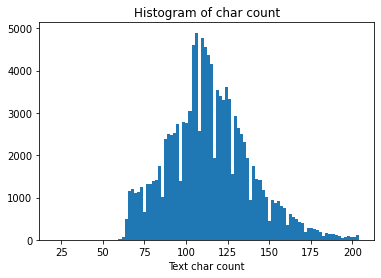

In [ ]:
import matplotlib.pyplot as plt
_ = plt.hist(df['text_len'], bins=100)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

Text(0.5, 0, 'features count')

Text(0.5, 1.0, 'Histogram of char count')

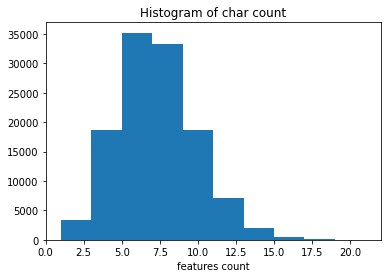

In [ ]:
_ = plt.hist(df['feat_len'], bins=10)
plt.xlabel('features count')
plt.title("Histogram of features count")

In [ ]:
json.dumps(json.loads("""{"feature": [["类型", "裤"], ["风格", "简约"], ["风格", "潮"], ["图案", "格子"], ["图案", "几何"], ["图案", "线条"], ["裤长", "七分裤"], ["裤型", "阔腿裤"]], "title": "", "largeSrc": "http://gw.alicdn.com/imgextra/i2/646511815/TB2KBRHb1ySBuNjy1zdXXXPxFXa_!!646511815-0-beehive-scenes.jpg_790x10000Q75.jpg", "refSrc": "https://market.m.taobao.com/apps/market/content/index.html?&contentId=200551261363", "desc": "这 款 阔腿裤 ， 整体 设计 简约 利落 ， 时尚 的 阔 腿 款式 带来 鲜明 的 几何 设计 美感 ， 褪去 传统 装束 的 厚重 与 臃肿 ， 更具 轻盈 美感 。 搭配 七分裤 长 修饰 出 挺拔 的 腿部 线条 ， 气质 的 格纹 图案 不 显 单调 ， 尽显 女性 优雅 气质 。 斜门襟 设计 潮流 出众 ， 让 你 时刻 保持 动人 的 女性 风采 。", "file": "fcc77fd7d27d564aed705d99b33e6a39.jpg", "专有属性": [["裤长", "七分裤"], ["裤型", "阔腿裤"], ["类型", "裤"]], "共有属性": [["风格", "简约"], ["风格", "潮"], ["图案", "格子"], ["图案", "几何"], ["图案", "线条"]], "segment": {"seg_0": {"segId": 0, "key_type": ["裤型", "图案", "风格"], "order": [["风格", "简约"], ["裤型", "阔腿裤"], ["图案", "几何"]], "seg": "这 款 阔腿裤 ， 整体 设计 简约 利落 ， 时尚 的 阔 腿 款式 带来 鲜明 的 几何 设计 美感 ， 褪去 传统 装束 的 厚重 与 臃肿 ， 更具 轻盈 美感 。"}, "seg_1": {"segId": 1, "key_type": ["图案", "裤长"], "order": [["裤长", "七分裤"], ["图案", "线条"], ["图案", "格子"]], "seg": "搭配 七分裤 长 修饰 出 挺拔 的 腿部 线条 ， 气质 的 格纹 图案 不 显 单调 ， 尽显 女性 优雅 气质 。"}, "seg_2": {"segId": 2, "key_type": ["风格"], "order": [["风格", "潮"]], "seg": "斜门襟 设计 潮流 出众 ， 让 你 时刻 保持 动人 的 女性 风采 。"}}}
"""), ensure_ascii=False)

'{"feature": [["类型", "裤"], ["风格", "简约"], ["风格", "潮"], ["图案", "格子"], ["图案", "几何"], ["图案", "线条"], ["裤长", "七分裤"], ["裤型", "阔腿裤"]], "title": "", "largeSrc": "http://gw.alicdn.com/imgextra/i2/646511815/TB2KBRHb1ySBuNjy1zdXXXPxFXa_!!646511815-0-beehive-scenes.jpg_790x10000Q75.jpg", "refSrc": "https://market.m.taobao.com/apps/market/content/index.html?&contentId=200551261363", "desc": "这 款 阔腿裤 ， 整体 设计 简约 利落 ， 时尚 的 阔 腿 款式 带来 鲜明 的 几何 设计 美感 ， 褪去 传统 装束 的 厚重 与 臃肿 ， 更具 轻盈 美感 。 搭配 七分裤 长 修饰 出 挺拔 的 腿部 线条 ， 气质 的 格纹 图案 不 显 单调 ， 尽显 女性 优雅 气质 。 斜门襟 设计 潮流 出众 ， 让 你 时刻 保持 动人 的 女性 风采 。", "file": "fcc77fd7d27d564aed705d99b33e6a39.jpg", "专有属性": [["裤长", "七分裤"], ["裤型", "阔腿裤"], ["类型", "裤"]], "共有属性": [["风格", "简约"], ["风格", "潮"], ["图案", "格子"], ["图案", "几何"], ["图案", "线条"]], "segment": {"seg_0": {"segId": 0, "key_type": ["裤型", "图案", "风格"], "order": [["风格", "简约"], ["裤型", "阔腿裤"], ["图案", "几何"]], "seg": "这 款 阔腿裤 ， 整体 设计 简约 利落 ， 时尚 的 阔 腿 款式 带来 鲜明 的 几何 设计 美感 ， 褪去 传统 装束 的 厚重 与 臃肿 ， 更具 轻盈 美感 。"}, "seg_1": {"segId": 1, "key_type":

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['text_len'] = df['text'].apply(lambda x: len(x.split(" ")))
print(df['text_len'].describe())

In [ ]:
_ = plt.hist(df['text_len'], bins=100) # bins 数据划分区间
plt.xlabel('Text char count')
plt.title("Histogram of char count")

# 词频统计

使用gensim训练好的的模型中含有vocab，是按照词频排序的

In [ ]:
import pickle
vocab = pickle.load(open("checkpoints/data2text/vocab.pkl", "rb"))

In [ ]:
len(vocab)

17486

In [ ]:
vocab[:100]

['<PAD>',
 '<S>',
 '<E>',
 '<UNK>',
 '，',
 '的',
 '。',
 '设计',
 '了',
 '<UNK>',
 '感',
 '时尚',
 '又',
 '是',
 '版型',
 '很',
 '让',
 '在',
 '采用',
 '气质',
 '舒适',
 '优雅',
 '有',
 '出',
 '上',
 '这',
 '穿',
 '也',
 '穿着',
 '和',
 '连衣裙',
 '线条',
 '款',
 '面料',
 '你',
 '修饰',
 '宽松',
 '与',
 '搭配',
 '精致',
 '小',
 '不',
 '个性',
 '简约',
 '显瘦',
 '整体',
 '气息',
 '经典',
 '身材',
 '能',
 '可以',
 '更加',
 '更',
 '性感',
 '同时',
 '好',
 '拼接',
 '衬衫',
 '而',
 '印花',
 '女性',
 '点缀',
 '装饰',
 '都',
 '人',
 '休闲',
 '效果',
 '非常',
 '复古',
 '彰显',
 '；',
 '造型',
 '上身',
 '带来',
 '增添',
 '轻松',
 '着',
 '视觉',
 '一款',
 '甜美',
 '显得',
 '还',
 '撞色',
 '十足',
 '裙摆',
 '清新',
 '条纹',
 '给',
 '更显',
 '剪裁',
 '时髦',
 '风格',
 '款式',
 '修身',
 '凸显',
 '展现',
 '感觉',
 '元素',
 '图案',
 '魅力']

# 词云展示

In [ ]:
import wordcloud
import jieba
import os

save_dir = "data/imgs"
font_path="/System/Library/fonts/PingFang.ttc"

txt = "一百年前，中国人苦苦寻找适合中国国情的道路。君主立宪制、复辟帝制、议会制、多党制、总统制都想过了、试过了，结果都行不通。最后，中国选择了社会主义道路"
seg_list = " ".join(jieba.cut(txt))
w=wordcloud.WordCloud(font_path=font_path)
w.generate(seg_list)
w.to_file(os.path.join(save_dir, "cloud.png"))

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec.load("checkpoints/word2vec/word2vec.model")

In [ ]:
# 获取所有词
vocab = model.wv.index2word
# 获取所有向量
word_vectors = model.wv.vectors

In [ ]:
id2vec = model.wv.vectors.tolist()
id2word = model.wv.index2word
vocab = ["<PAD>", "<S>", "<E>", "<UNK>"]
vectors = []

for i in range(len(vocab)):
    vectors.append(list(np.random.uniform(low=-0.1, high=0.1, size=(300,))))

vocab = vocab + id2word
vectors = vectors + id2vec

In [ ]:
np.savetxt("vectors.txt", vectors)

In [ ]:
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for idx, word in enumerate(vocab)}

In [ ]:
import tensorflow as tf

In [ ]:
word_embedding = tf.get_variable("word_embedding", dtype=tf.float32,
                                 initializer=tf.constant(word_vector, dtype=tf.float32))

In [ ]:
x = tf.nn.embedding_lookup(word_embedding, 0)

In [ ]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    z = sess.run(x)

In [ ]:
import numpy as np

In [ ]:
len(list(np.random.uniform(low=-0.1, high=0.1, size=))

SyntaxError: unexpected EOF while parsing (<ipython-input-7-32cff6d290d1>, line 1)

# 处理新数据

In [ ]:
%cd /content/drive/MyDrive/nlp
!pwd

/content/drive/MyDrive/nlp
/content/drive/MyDrive/nlp


In [ ]:
import json
with open("data/data2text/train.json", "r") as f:
    lines = f.readlines()

In [ ]:
import jieba
feat_len = []
seg_len = []
with open("data/data2text/corpus.txt", "w") as f:
    for line in lines:
        record = json.loads(line)
        for _, seg in record["segment"].items():
            feat_len.append(len(seg["order"]))
            f.write(" ".join(list(jieba.cut("".join(seg["seg"])))) + "\n")
#             tokens = seg["seg"].split()
#             seg_len.append(len(tokens))

In [ ]:
import pandas as pd
df = pd.DataFrame(feat_len)
df.describe()

,0
count,369403.000000
mean,2.153651
std,1.634395
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,20.000000


In [ ]:
df = pd.DataFrame(seg_len)
df.describe()

ValueError: ignored

In [ ]:
features

[[['风格', '简约'], ['材质', '牛仔布'], ['衣样式', '外套'], ['颜色', '白色']],
 [['衣款式', '破洞']],
 [['图案', '刺绣']]]

In [ ]:
segs

['简约 而 不 简单 的 牛仔 外套 ， 白色 的 衣身 十分 百搭 。',
 '衣身 多处 有 做 旧 破洞 设计 ， 打破 单调乏味 ， 增加 一丝 造型 看点 。',
 '衣 身后 背处 有 趣味 刺绣 装饰 ， 丰富 层次感 ， 彰显 别样 时尚 。']

In [1]:
import tensorflow as tf
import numpy as np
reader = tf.TFRecordReader()

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TFRecordDataset`.


In [3]:
d = tf.data.TFRecordDataset("checkpoints/data2text/train.tf_record")
def _decode_record(record):
    """Decodes a record to a TensorFlow example."""
    features = {
            "cate_id": tf.FixedLenFeature((), tf.string),
            "key_input_ids": tf.FixedLenFeature((), tf.string),
            "val_input_ids": tf.FixedLenFeature((), tf.string),
            "text_ids": tf.FixedLenFeature((), tf.string),
            "outputs_ids": tf.FixedLenFeature((), tf.string),
            "outputs_shape": tf.FixedLenFeature((), tf.string),
            "groups_ids": tf.FixedLenFeature((), tf.string),
            "groups_shape": tf.FixedLenFeature((), tf.string)
        }
    raw_example = tf.parse_single_example(record, features)
    # tf.Example only supports tf.int64, but the TPU only supports tf.int32.
    # So cast all int64 to int32.
    # for name in list(example.keys()):
    #     t = example[name]
    #     if t.dtype == tf.int64:
    #         t = tf.to_int32(t)
    #     example[name] = t
    example = {
            'cate_id': tf.decode_raw(raw_example['cate_id'], tf.int32),
            'key_input_ids': tf.decode_raw(raw_example['key_input_ids'], tf.int32),
            'val_input_ids': tf.decode_raw(raw_example['val_input_ids'], tf.int32),
            'text_ids': tf.decode_raw(raw_example['text_ids'], tf.int32),
            'outputs_ids': tf.reshape(tf.decode_raw(raw_example['outputs_ids'], tf.int32),
                                      tf.decode_raw(raw_example['outputs_shape'], tf.int32)),
            # 'outputs_shape': tf.decode_raw(raw_example['outputs_shape'], tf.int32),
            'groups_ids': tf.reshape(tf.decode_raw(raw_example['groups_ids'], tf.int32),
                                     tf.decode_raw(raw_example['groups_shape'], tf.int32)),
            # 'groups_shape': tf.decode_raw(raw_example['groups_shape'], tf.int32)
        }
    return example

d = d.map(_decode_record)

d = d.repeat()
d = d.shuffle(buffer_size=10000)

padded_shapes = {
    'cate_id': tf.TensorShape([None]),  # [] Scalar elements, no padding.
    'key_input_ids': tf.TensorShape([None]),  # [None] Vector elements, padded to longest.
    'val_input_ids': tf.TensorShape([None]),  # [None, None]Matrix elements, padded to longest
    'text_ids': tf.TensorShape([None]),
    'outputs_ids': tf.TensorShape([None, None]),
    'groups_ids': tf.TensorShape([None, None])
}


d = d.padded_batch(batch_size=4,
                   padded_shapes=padded_shapes)
iterator = d.make_one_shot_iterator()
next_data = iterator.get_next()
with tf.Session() as sess:
    data = sess.run(next_data)

In [4]:
for k, v in data.items():
    print(k, data[k].shape)

cate_id (4, 1)
key_input_ids (4, 9)
val_input_ids (4, 9)
text_ids (4, 69)
outputs_ids (4, 4, 55)
groups_ids (4, 4, 7)


In [5]:
data

{'cate_id': array([[103],
        [256],
        [103],
        [103]], dtype=int32),
 'key_input_ids': array([[ 7,  8,  8,  8,  4, 10, 16, 27,  0],
        [ 7, 11,  8, 25, 13, 24,  0,  0,  0],
        [ 7,  2, 11, 12, 12,  4, 10, 20, 20],
        [ 7, 12,  6, 20, 20,  0,  0,  0,  0]], dtype=int32),
 'val_input_ids': array([[103, 134, 109, 128,  65, 346, 490, 478,   0],
        [256, 208, 137,   1, 257, 444,   0,   0,   0],
        [103,   4, 213, 239, 217,  57,   1, 408, 459],
        [103, 239, 445, 413, 445,   0,   0,   0,   0]], dtype=int32),
 'text_ids': array([[  128,    91,     7,     5,    12,   247,   472,   467,     5,
           118,   620,     5,     7,   232,   629,   572,   256,  1864,
             5,    58,   231,     5,     7,   288,     4,    58,   231,
           383,     5,    91,     5,     7,   353,  2295,   247,   118,
           201,     5,    94,    13,    17,   702,     5,  1771,     4,
           206,    81,    41,    11,    13,    17,    89,     5,  1637,
  

In [64]:
 for example in tf.io.tf_record_iterator("checkpoints/data2text/train.tf_record"):  
        print(tf.train.Example.FromString(example))  

features {
  feature {
    key: "cate_id"
    value {
      bytes_list {
        value: "\323\001\000\000\000\000\000\000"
      }
    }
  }
  feature {
    key: "groups_ids"
    value {
      bytes_list {
        value: "\001\000\000\000\000\000\000\000\007\000\000\000\000\000\000\000\004\000\000\000\000\000\000\000\006\000\000\000\000\000\000\000\005\000\000\000\000\000\000\000\003\000\000\000\000\000\000\000\002\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000"
      }
    }
  }
  feature {
    key: "groups_shape"
    value {
      int64_list {
        value: 3
        value: 3
      }
    }
  }
  feature {
    key: "key_input_ids"
    value {
      bytes_list {
        value: "\007\000\000\000\000\000\000\000\014\000\000\000\000\000\000\000\014\000\000\000\000\000\000\000\010\000\000\000\000\000\000\000\010\000\000\000\000\000\000\000\010\000\000\000\000\000\000\000\032\000\000\000\000\000\000\000\027\000\000\000\000\000\000\000"
      }
 

## 统计不同类型下的feature，方便用户的选择

In [13]:
import json
import os
import re
import sys

import jieba
from tqdm import tqdm
import pandas as pd

root_dir = "data/data2text/train_bk.json"
    
# {
#     "feature": [["版型", "显瘦"], ["颜色", "灰色"], ["衣样式", "风衣"], ["衣样式", "外套"], ["衣袖型", "插肩袖"], ["衣门襟", "单排扣"]], 
#     "title": "", 
#     "largeSrc": "http://gw.alicdn.com/imgextra/i2/87171848/TB2BKKiahuTBuNkHFNRXXc9qpXa_!!87171848-2-daren.png_790x10000.jpg", 
#     "refSrc": "https://market.m.taobao.com/apps/market/content/index.html?&contentId=200550500064", 
#     "desc": "设计亮点这款中长款式的风衣外套，修身直筒的版型不仅仅穿着随意舒适，还能够轻松修饰身体轮廓更添高挑大气。时髦的插肩袖设计，也丰富了整体的层次感。衣门襟采用单排扣设计，显得厚实不失质感，很是吸引人的眼球。选用灰色调装饰，搭配起来也比较方便。", 
#     "file": "c0974de49d2bcf5cd49e1bb679f56d2c.jpg"
# }

features = {}

pants = {}
cloth = {}
dress = {}

with open(root_dir, "r") as fr:
    for line in tqdm(fr.readlines(), desc="评论数据", colour="green"):
        tmp = json.loads(line)
        feat = tmp["feature"]
#         for item in feat:
#             if item[0] == '类型':
#                 lx = item[1]
        if feat[0][1] == '裤':
            for item in feat:
                if item[0] in pants.keys():
                    pants[item[0]].add(item[1])
                else:
                    pants[item[0]] = set(item[1])
        elif feat[0][1] == '上衣':
            for item in feat:
                if item[0] in cloth.keys():
                    cloth[item[0]].add(item[1])
                else:
                    cloth[item[0]] = set(item[1])
        else:
            for item in feat:
                if item[0] in dress.keys():
                    dress[item[0]].add(item[1])
                else:
                    dress[item[0]] = set(item[1])

评论数据: 100%|██████████| 114599/114599 [00:01<00:00, 59117.21it/s]


In [18]:
pants

{'类型': {'裤'},
 '版型': {'h', '宽', '宽松', '显瘦', '松', '立体剪裁'},
 '风格': {'ol',
  '中国风',
  '休闲',
  '原创设计',
  '商务绅士',
  '嘻哈',
  '复古',
  '宫廷',
  '居家',
  '工装',
  '性',
  '性感',
  '感',
  '摇滚',
  '文艺',
  '日系',
  '朋克',
  '欧美',
  '民族风',
  '淑女',
  '清新',
  '潮',
  '瑞丽',
  '知性',
  '简约',
  '职场',
  '英伦',
  '街头',
  '运动',
  '通勤',
  '青春',
  '韩版',
  '高贵'},
 '图案': {'亮面',
  '人物',
  '几何',
  '创意',
  '刺绣',
  '动物',
  '千鸟格',
  '卡通',
  '印花',
  '圆点',
  '复古',
  '大花',
  '字母',
  '小熊',
  '建筑',
  '形状',
  '心形',
  '恶魔',
  '手绘',
  '抽象',
  '拼色',
  '搞怪',
  '撞色',
  '文字',
  '斑马纹',
  '条',
  '条纹',
  '格子',
  '植物',
  '波点',
  '渐变',
  '环保',
  '电影',
  '碎花',
  '纯色',
  '线',
  '线条',
  '绘画',
  '色块',
  '花色',
  '菱形',
  '蕾丝',
  '蝴蝶结',
  '豹纹',
  '迷彩',
  '音乐',
  '风景',
  '骷髅'},
 '裤型': {'哈伦裤', '垮裤', '灯笼裤', '直筒裤', '背带裤', '腿', '裤', '连衣裤', '铅笔裤', '阔', '阔腿裤'},
 '材质': {'丝绒',
  '亚麻',
  '仔',
  '天丝',
  '布',
  '斜纹',
  '棉',
  '棉麻',
  '水洗',
  '涤纶',
  '混纺',
  '牛',
  '牛仔布',
  '纤维',
  '绸缎',
  '网纱',
  '羊毛',
  '羊绒',
  '莱卡',
  '蕾丝',
  '蚕丝',
  '西装面料',
  '针织',
  '雪纺'},

In [ ]:
{'datas': [{'key': "", 'val': ""}]}

In [26]:
datas = []
for k, v in dress.items():
    tmp = {'key': k,
            'val': [i for i in v]}
    datas.append(tmp)

In [27]:
import json
json.dumps({'datas': datas}, ensure_ascii=False)

'{"datas": [{"key": "类型", "val": ["裙"]}, {"key": "风格", "val": ["潮", "宫廷", "复古", "知性", "民族风", "清新", "乡村", "青春", "朋克", "街头", "简约", "简", "淑女", "欧美", "文艺", "ol", "休闲", "通勤", "嘻哈", "日系", "约", "工装", "职场", "英伦", "性感", "摇滚", "韩版", "瑞丽", "中国风", "运动", "高贵", "居家", "原创设计"]}, {"key": "图案", "val": ["碎花", "电影", "圆点", "复古", "骷髅", "印花", "亮面", "几何", "刺绣", "拼色", "文字", "撞色", "小熊", "渐变", "动物", "蝴蝶结", "风景", "心形", "手绘", "条", "字母", "波点", "音乐", "植物", "蕾丝", "大花", "千鸟格", "搞怪", "恶魔", "线条", "豹纹", "形状", "绘画", "色块", "卡通", "迷彩", "环保", "斑马纹", "条纹", "建筑", "创意", "抽象", "人物", "花色", "纹", "格子", "菱形", "纯色"]}, {"key": "裙型", "val": ["裙", "伞裙", "公主裙", "仙女裙", "a字", "网纱裙", "尾", "蓬蓬裙", "小黑裙", "包臀裙", "铅笔裙", "蛋糕", "背带裙", "花苞裙", "大裙摆", "百褶", "抹胸裙", "衬衫裙", "一步裙", "拼接裙", "直筒裙", "鱼尾裙", "鱼", "灯笼裙", "西装裙", "牛仔裙"]}, {"key": "裙袖长", "val": ["短袖", "袖", "无袖", "无", "长袖", "五分袖", "七分袖", "九分袖"]}, {"key": "版型", "val": ["h", "宽", "宽松", "松", "立体剪裁", "显瘦"]}, {"key": "材质", "val": ["网纱", "牛仔布", "雪纺", "蚕丝", "棉", "棉麻", "绸缎", "天丝", "水洗", "丝绒", "雪", "针织", "